In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [9]:
def simulated_annealing(objective, bounds, n_iter, step_size, temp):
  best = bounds[:,0] + np.random.rand(len(bounds)) * ( bounds[:,1] - bounds[:,0])
  best_eval = objective(best)

  curr, curr_eval = best, best_eval
  scores = list()
  scores.append(best_eval)
  for i in range(n_iter):
    candidate = curr + np.random.randn(len(bounds)) * step_size
    candidate_eval = objective(candidate)

    if candidate_eval < best_eval:
      best, best_eval = candidate, candidate_eval
      scores.append(best_eval)


    diff = candidate_eval - curr_eval
    t = temp/float(i+1)
    metropolis = np.exp(-diff/t)

    if diff < 0 or np.random.rand() < metropolis:
      curr, curr_eval = candidate, candidate_eval

  return [best, best_eval, scores]


In [6]:
def objective(x):
  return x ** 2.0

r_min, r_max = -5.0, 5.0
inputs = np.arange(r_min, r_max, 0.1)
results = [objective(x) for x in inputs ]


In [10]:
np.random.seed(1)
bounds = np.asarray([[-5.0, 5.0]])
n_iter = 1000
step_size = 0.1
temp = 10
best, score, scores = simulated_annealing(objective, bounds, n_iter, step_size, temp)


In [8]:
print("Best = ", best)
print("Score = ", score)


Best =  [0.00013605]
Score =  [1.85086423e-08]


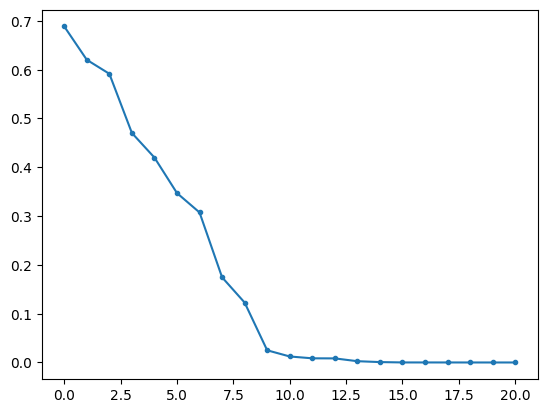

In [11]:
plt.plot(scores, '.-')
plt.show()